In [146]:
import os
import pandas as pd
import numpy as np


In [147]:
directory="Metal Surface Detector"

In [148]:
train_dir=os.path.join(directory,'train')
val_dir=os.path.join(directory,'valid')

In [149]:
os.listdir(train_dir)

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']

In [150]:
data={}

for name in os.listdir(train_dir):
    temp=[]
    for path in os.listdir(os.path.join(train_dir,name)):
        p=os.path.join(os.path.join(train_dir,name),path)
        temp.append(p)
    data[name]=temp    

In [151]:
data

{'Crazing': ['Metal Surface Detector\\train\\Crazing\\Cr_120.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_121.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_122.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_123.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_124.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_125.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_126.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_127.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_128.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_129.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_13.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_130.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_131.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_132.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_133.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_134.bmp',
  'Metal Surface Detector\\train\\Crazing\\Cr_135.bmp',
  'Metal Surface Detector\\train\\Craz

In [152]:
import matplotlib.pyplot as plt
import cv2

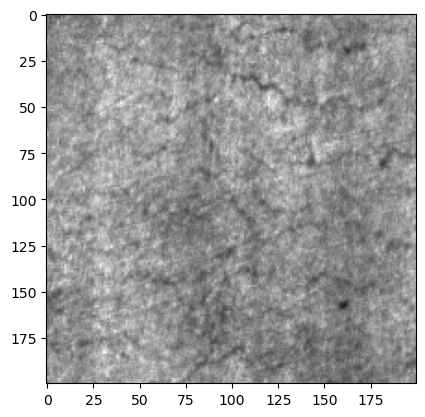

In [153]:
img=cv2.imread(data['Crazing'][0])

plt.imshow(img)

In [154]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [155]:
datagen=ImageDataGenerator(rescale=1./255.0)


In [156]:
train_gen=datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='sparse'
)

val_gen=datagen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='sparse'
)

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [157]:
from keras.models import Sequential
import keras.layers as lyrs
from keras.applications import VGG16

In [162]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False 

model = Sequential([
    base_model,
    lyrs.Flatten(),
    lyrs.Dense(16),
    lyrs.LeakyReLU(alpha=0.1),
    lyrs.Dropout(0.5),
    lyrs.Dense(8, activation='relu'),
    lyrs.Dense(6, activation='softmax')
])

In [163]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │         401,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 6)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,116,302 (57.66 MB)

 Trainable params: 401,614 (1.53 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [164]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [165]:
model.fit(
    
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=10,
    validation_data=val_gen,      
    validation_steps=len(val_gen),
    verbose=True
)


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 316s 6s/step - accuracy: 0.3563 - loss: 1.4768 - val_accuracy: 0.6806 - val_loss: 0.9938
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 356s 7s/step - accuracy: 0.5622 - loss: 1.0569 - val_accuracy: 0.8750 - val_loss: 0.6035
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 358s 7s/step - accuracy: 0.6920 - loss: 0.8123 - val_accuracy: 0.9861 - val_loss: 0.3336
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 402s 8s/step - accuracy: 0.7554 - loss: 0.6779 - val_accuracy: 0.9861 - val_loss: 0.3102
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 465s 9s/step - accuracy: 0.7838 - loss: 0.5846 - val_accuracy: 0.9861 - val_loss: 0.1313
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 394s 8s/step - accuracy: 0.8442 - loss: 0.4511 - val_accuracy: 0.9861 - val_loss: 0.0960
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 388s 7s/step - accuracy: 0.8521 - loss: 0.4378 - val_accuracy: 0.9861 - val_loss: 0.0462
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 363s 7s/step - accuracy: 0.8798 - loss: 0.3577 - val_accuracy: 0.9861 - v

In [166]:
model.save("Metal_image_Damage_Identifier.keras")

In [174]:
img=cv2.imread(data['Crazing'][1])

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
img = cv2.resize(img, (224,224))
img = img / 255.0

img = np.expand_dims(img, axis=0)  

pred = model.predict(img)

pred_class = np.argmax(pred, axis=1)[0]
print("Predicted class:", pred_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
Predicted class: 0
